In [1]:
from pathlib import Path
home = str(Path.home())
import sys
sys.path.append('{}/prog/msm/lib'.format(home))

In [2]:
import numpy as np
from simlib import *
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.set_cmap('rainbow')

<Figure size 432x288 with 0 Axes>

In [52]:
#S = np.random.uniform(0.25,1.25,1)
S = np.array([1/np.sqrt(2)])
g = gaussian(A = np.ones(1),
             M = np.zeros(1),
             S = S)
N = 5000
print('1/s^2 =', 1/S[0]**2)
parameters = {
    'name': 'equilibrium_test',
    'num_steps': 150,
    'num_dim': 1,
    'num_particles': N,
    'KBT': 1,
    'Ddt': 0.01,
    'x0': np.ones(N) * 1.5,
    'potential': potential([g])
}

1/s^2 = 2.0000000000000004


In [53]:
Xs = simulate(parameters)

In [54]:
num_steps = parameters['num_steps']
mean = np.zeros(num_steps)
var = np.zeros(num_steps)
for t in range(num_steps):
    mean[t] = np.mean(Xs[t,0,:])
    var[t] = np.var(Xs[t,0,:])

# Theory
x0 = parameters['x0'][0]
Ddt = parameters['Ddt']
beta = 1/parameters['KBT']
V = parameters['potential'].gaussians[0].S[0]**2
bk = 1/V
mean_theory = x0 * np.exp(-1*Ddt*bk*range(num_steps))
var_theory = 1/(bk) * (1-np.exp(-2*bk*Ddt*range(num_steps)))

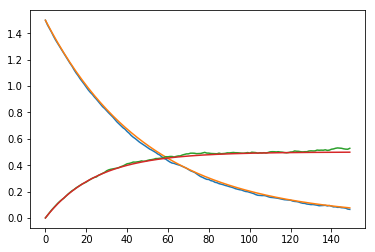

In [55]:
plt.plot(range(num_steps), mean)
plt.plot(range(num_steps), mean_theory)
plt.plot(range(num_steps), var)
plt.plot(range(num_steps), var_theory)